 # Support Vector Machines (SVMs) using the scikit-learn library,

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

In [2]:
# Load dataset
# Using Iris dataset for demonstration (binary classification for simplicity)
iris = datasets.load_iris()
X = iris.data[iris.target != 2]  # Select two classes for binary classification
y = iris.target[iris.target != 2]

In [3]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# 1. Linear SVM Classification with Feature Scaling
linear_svm = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1))
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)

In [5]:
print("Linear SVM Classification Results")
print(classification_report(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

Linear SVM Classification Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[17  0]
 [ 0 13]]


In [6]:
# 2. Nonlinear SVM Classification with RBF Kernel
rbf_svm = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=0.7, C=1))
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)

In [7]:
print("\nNonlinear SVM Classification with RBF Kernel Results")
print(classification_report(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


Nonlinear SVM Classification with RBF Kernel Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[17  0]
 [ 0 13]]


In [8]:
# 3. Polynomial Kernel SVM
poly_svm = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, C=1))
poly_svm.fit(X_train, y_train)
y_pred_poly = poly_svm.predict(X_test)

In [9]:
print("\nPolynomial Kernel SVM Results")
print(classification_report(y_test, y_pred_poly))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_poly))


Polynomial Kernel SVM Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[17  0]
 [ 0 13]]


In [10]:
# 4. Hyperparameter Tuning: Using GridSearchCV to find optimal C and gamma for RBF kernel
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1]
}
grid_search = GridSearchCV(rbf_svm, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('svc', SVC(C=1, gamma=0.7))]),
             param_grid={'svc__C': [0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1]})

In [11]:
print("\nBest parameters found by GridSearchCV for RBF Kernel:")
print(grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# 5. Visualization of Decision Boundaries (for 2 features only for simplicity)
def plot_decision_boundary(model, X, y):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    plt.figure(figsize=(8, 6))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=20)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("SVM Decision Boundary")
    plt.show()


Best parameters found by GridSearchCV for RBF Kernel:
{'svc__C': 0.1, 'svc__gamma': 0.1}
Best cross-validation accuracy: 1.00


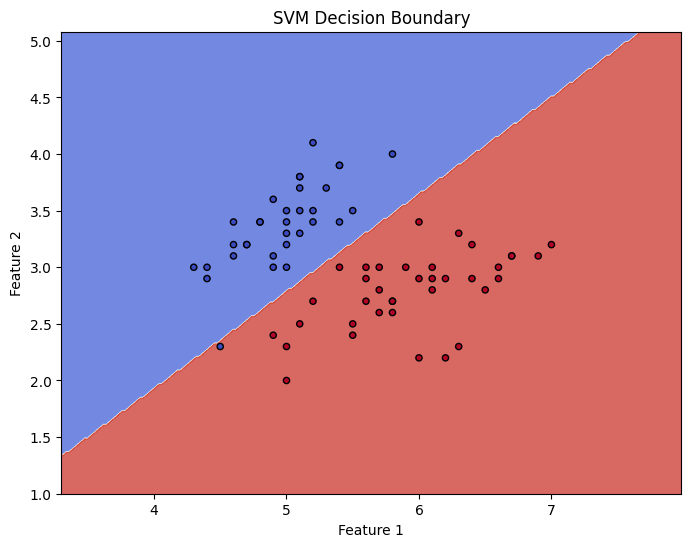

In [12]:
# Using only two features for simplicity in visualization
X_vis = X_train[:, :2]
y_vis = y_train
linear_svm_vis = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1)).fit(X_vis, y_vis)
plot_decision_boundary(linear_svm_vis, X_vis, y_vis)

# 1. Linear SVM Classifier
This example demonstrates how to create a linear SVM classifier using scikit-learn.

In [16]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a sample binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
y = (y > 0).astype(int)  # Convert labels to 0 and 1

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM classifier
linear_svm = SVC(kernel='linear', C=1.0)  # Soft margin parameter C
linear_svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_svm.predict(X_test)
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred))


Linear SVM Accuracy: 0.95


In [19]:
# Import required libraries
from sklearn.svm import SVC
import numpy as np
# Generate a sample binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
y = (y > 0).astype(int)  # Convert labels to 0 and 1

# Polynomial kernel SVM
poly_svm = SVC(kernel='poly', degree=3, gamma='scale', coef0=1)
poly_svm.fit(X, y)

# Gaussian RBF kernel SVM
rbf_svm = SVC(kernel='rbf', gamma=0.5)
rbf_svm.fit(X, y)

# Sigmoid kernel SVM
sigmoid_svm = SVC(kernel='sigmoid', gamma=0.5, coef0=1)
sigmoid_svm.fit(X, y)

# Predict with each model
print("Polynomial Kernel Prediction:", poly_svm.predict([X[0]]))
print("RBF Kernel Prediction:", rbf_svm.predict([X[0]]))
print("Sigmoid Kernel Prediction:", sigmoid_svm.predict([X[0]]))


Polynomial Kernel Prediction: [0]
RBF Kernel Prediction: [0]
Sigmoid Kernel Prediction: [1]


# Making Predictions with Kernel SVMs
This example shows how to make predictions using the support vectors without explicitly calculating

In [20]:
# Using the previously trained RBF SVM
new_instance = np.array([[2, 3]])

# Prediction based on kernel evaluations
prediction = rbf_svm.predict(new_instance)
print("Prediction for new instance with RBF kernel:", prediction)


Prediction for new instance with RBF kernel: [1]
